In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from main.utils import data_manage_utils

# Variables
ROOT_PATH = os.path.abspath("../../../")
INPUT_FOLDER = os.path.join(ROOT_PATH, "data/preprocessing/processed_files")

In [15]:
X_train, y_train, X_test, y_test = data_manage_utils.load_processed_data_by_folder(os.path.join(INPUT_FOLDER, "CCLASS"))

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

In [16]:
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from main.utils import train_utils

# Loading Classifier 
clf_ada = AdaBoostClassifier(learning_rate=0.7, n_estimators=50, random_state=42) 
clf_rf = RandomForestClassifier(max_depth=8, n_estimators=50)

rf_results = train_utils.custom_cross_validate(clf=clf_rf, X=X_train, y=y_train, scoring=["accuracy", "balanced_accuracy"], return_train_scores=True)
ada_results = train_utils.custom_cross_validate(clf=clf_ada, X=X_train, y=y_train, scoring=["accuracy", "balanced_accuracy"], return_train_scores=True)

Starting cross_validation at: 2024_06_16 19:02
At step 1/5 splits.
At step 2/5 splits.
At step 3/5 splits.
At step 4/5 splits.
At step 5/5 splits.
Ending cross_validation fit at: 2024_06_16 19:03
Time elapsed: 0:01:02.198105
Starting cross_validation at: 2024_06_16 19:03
At step 1/5 splits.
At step 2/5 splits.
At step 3/5 splits.
At step 4/5 splits.
At step 5/5 splits.
Ending cross_validation fit at: 2024_06_16 19:05
Time elapsed: 0:01:32.912571


In [17]:
rf_results = train_utils.calc_mean_result_stats(rf_results)
ada_results = train_utils.calc_mean_result_stats(ada_results)

In [18]:
rf_results

{'val_scores': {'accuracy': {'mean': 0.691585232026142,
   'std': 0.001247945348004202},
  'balanced_accuracy': {'mean': 0.5746683057872537,
   'std': 0.0024703720905541585},
  'fit_time': {'mean': 10.8446608, 'std': 0.6182307229073623},
  'pred_time': {'mean': 0.30323100000000003, 'std': 0.019298462975066176}},
 'train_scores': {'accuracy': {'mean': 0.6928988549442435,
   'std': 0.0009079997523326963},
  'balanced_accuracy': {'mean': 0.5762004324693368,
   'std': 0.0018916392302055184},
  'fit_time': {'mean': 10.8446608, 'std': 0.6182307229073623},
  'pred_time': {'mean': 1.2105694, 'std': 0.05870291699259923}}}

In [19]:
ada_results

{'val_scores': {'accuracy': {'mean': 0.7100386023606942,
   'std': 0.0006545266577238215},
  'balanced_accuracy': {'mean': 0.6422073366341452,
   'std': 0.002291991933173149},
  'fit_time': {'mean': 15.4189412, 'std': 0.32514665996832876},
  'pred_time': {'mean': 0.6081154, 'std': 0.0436952716920264}},
 'train_scores': {'accuracy': {'mean': 0.7099816117340085,
   'std': 0.0005897574926957327},
  'balanced_accuracy': {'mean': 0.6421361139979568,
   'std': 0.0016831693762695487},
  'fit_time': {'mean': 15.4189412, 'std': 0.32514665996832876},
  'pred_time': {'mean': 2.4755874000000007, 'std': 0.04371992139334207}}}

In [20]:
sampler = SMOTE(random_state=42)

smote_rf_results = train_utils.custom_cross_validate(clf=clf_rf, X=X_train, y=y_train, scoring=["accuracy", "balanced_accuracy"], return_train_scores=True, sampler=sampler)
smote_ada_results = train_utils.custom_cross_validate(clf=clf_ada, X=X_train, y=y_train, scoring=["accuracy", "balanced_accuracy"], return_train_scores=True, sampler=sampler)

Starting cross_validation at: 2024_06_16 19:05
At step 1/5 splits.
At step 2/5 splits.
At step 3/5 splits.
At step 4/5 splits.
At step 5/5 splits.
Ending cross_validation fit at: 2024_06_16 19:08
Time elapsed: 0:03:05.446942
Starting cross_validation at: 2024_06_16 19:08
At step 1/5 splits.
At step 2/5 splits.
At step 3/5 splits.
At step 4/5 splits.
At step 5/5 splits.
Ending cross_validation fit at: 2024_06_16 19:12
Time elapsed: 0:04:20.047094


In [21]:
smote_rf_results

{'val_scores': {'accuracy': [0.6682433844341863,
   0.6679204422408389,
   0.6741133337132653,
   0.6675785034478828,
   0.6687879939209727],
  'balanced_accuracy': [0.6944853693274583,
   0.6954598904797548,
   0.6985832792588615,
   0.6948591659728754,
   0.6948004513660093],
  'fit_time': [35.147862, 36.002277, 34.950339, 35.907406, 36.009941],
  'pred_time': [0.272864, 0.309822, 0.292848, 0.288822, 0.267847]},
 'train_scores': {'accuracy': [0.6724543248338977,
   0.6726822851118193,
   0.6767570750796673,
   0.6703551906080365,
   0.6724416329477023],
  'balanced_accuracy': [0.7008028603888662,
   0.6999105874905073,
   0.6996347478765174,
   0.6976838226973011,
   0.6978362734014842],
  'fit_time': [35.147862, 36.002277, 34.950339, 35.907406, 36.009941],
  'pred_time': [1.098416, 1.12596, 1.165921, 1.094938, 1.095931]}}

In [22]:
smote_ada_results

{'val_scores': {'accuracy': [0.664975969301495,
   0.6626963773484547,
   0.6645580441101043,
   0.6641971087175396,
   0.6639437689969605],
  'balanced_accuracy': [0.6905271546616946,
   0.6939032221837579,
   0.6913735181881678,
   0.6923163358864609,
   0.6898037410432204],
  'fit_time': [48.601297, 47.51642, 49.93588, 49.938499, 48.061678],
  'pred_time': [0.576199, 0.623645, 0.586679, 0.59766, 0.574217]},
 'train_scores': {'accuracy': [0.6661094304317473,
   0.66214862060286,
   0.6644757151066427,
   0.6641195271723902,
   0.6649522235519842],
  'balanced_accuracy': [0.6944703593281784,
   0.6939930778606432,
   0.6899160162493218,
   0.6919802167008792,
   0.689030398369005],
  'fit_time': [48.601297, 47.51642, 49.93588, 49.938499, 48.061678],
  'pred_time': [2.463784, 2.480351, 2.568022, 2.541266, 2.573752]}}

In [23]:
smote_rf_results = train_utils.calc_mean_result_stats(smote_rf_results)
smote_ada_results = train_utils.calc_mean_result_stats(smote_ada_results)

In [24]:
smote_rf_results

{'val_scores': {'accuracy': {'mean': 0.6693287315514291,
   'std': 0.0024252575365809087},
  'balanced_accuracy': {'mean': 0.6956376312809919,
   'std': 0.0015061885577512596},
  'fit_time': {'mean': 35.603564999999996, 'std': 0.45843243709100606},
  'pred_time': {'mean': 0.28644060000000005, 'std': 0.014989741393366328}},
 'train_scores': {'accuracy': {'mean': 0.6729381017162247,
   'std': 0.002088154725520497},
  'balanced_accuracy': {'mean': 0.6991736583709353,
   'std': 0.0012180456613450704},
  'fit_time': {'mean': 35.603564999999996, 'std': 0.45843243709100606},
  'pred_time': {'mean': 1.1162332000000001, 'std': 0.027373730439236812}}}

In [25]:
smote_ada_results

{'val_scores': {'accuracy': {'mean': 0.6640742536949109,
   'std': 0.0007717262519959204},
  'balanced_accuracy': {'mean': 0.6915847943926603,
   'std': 0.0014314783161709969},
  'fit_time': {'mean': 48.8107548, 'std': 0.981631793808534},
  'pred_time': {'mean': 0.59168, 'std': 0.01803967491946571}},
 'train_scores': {'accuracy': {'mean': 0.6643611033731249,
   'std': 0.0012940359723521307},
  'balanced_accuracy': {'mean': 0.6918780137016055,
   'std': 0.0021523264056711807},
  'fit_time': {'mean': 48.8107548, 'std': 0.981631793808534},
  'pred_time': {'mean': 2.5254350000000003, 'std': 0.04523763582682005}}}

In [71]:
sampler = ADASYN(random_state=42)

adasyn_rf_results = train_utils.custom_cross_validate(clf=clf_rf, X=X_train, y=y_train, scoring=["accuracy", "balanced_accuracy"], return_train_scores=True, sampler=sampler)
adasyn_ada_results = train_utils.custom_cross_validate(clf=clf_ada, X=X_train, y=y_train, scoring=["accuracy", "balanced_accuracy"], return_train_scores=True, sampler=sampler)
adasyn_rf_results = train_utils.calc_mean_result_stats(adasyn_rf_results)
adasyn_ada_results = train_utils.calc_mean_result_stats(adasyn_ada_results)

Starting cross_validation at: 2024_06_16 20:17
At step 1/5 splits.
At step 2/5 splits.
At step 3/5 splits.
At step 4/5 splits.
At step 5/5 splits.
Ending cross_validation fit at: 2024_06_16 20:22
Time elapsed: 0:04:42.560582
Starting cross_validation at: 2024_06_16 20:22
At step 1/5 splits.
At step 2/5 splits.
At step 3/5 splits.
At step 4/5 splits.
At step 5/5 splits.
Ending cross_validation fit at: 2024_06_16 20:28
Time elapsed: 0:06:19.997800


In [72]:
adasyn_rf_results

{'val_scores': {'accuracy': {'mean': 0.6297092599300106,
   'std': 0.0030993777091076614},
  'balanced_accuracy': {'mean': 0.6905455195958031,
   'std': 0.002491609172873152},
  'fit_time': {'mean': 54.913331799999995, 'std': 2.462039628269812},
  'pred_time': {'mean': 0.28325379999999994, 'std': 0.011556983990643933}},
 'train_scores': {'accuracy': {'mean': 0.6340110743047583,
   'std': 0.0040417038861625},
  'balanced_accuracy': {'mean': 0.6950414457264871,
   'std': 0.0030468157583265266},
  'fit_time': {'mean': 54.913331799999995, 'std': 2.462039628269812},
  'pred_time': {'mean': 1.2271718, 'std': 0.11573924996715673}}}

In [73]:
adasyn_ada_results

{'val_scores': {'accuracy': {'mean': 0.6309782449093588,
   'std': 0.006070014178435466},
  'balanced_accuracy': {'mean': 0.6816171515844707,
   'std': 0.003488224044187318},
  'fit_time': {'mean': 72.6079218, 'std': 1.4290393893067335},
  'pred_time': {'mean': 0.6388382, 'std': 0.012451300966565687}},
 'train_scores': {'accuracy': {'mean': 0.6310105468353632,
   'std': 0.00581694501089171},
  'balanced_accuracy': {'mean': 0.6817034233144754,
   'std': 0.0030293496558915986},
  'fit_time': {'mean': 72.6079218, 'std': 1.4290393893067335},
  'pred_time': {'mean': 2.6599428000000005, 'std': 0.08232140029761408}}}

Validation and Tran scores are nearly identical, therefore I only proceed with validation scores for the plots

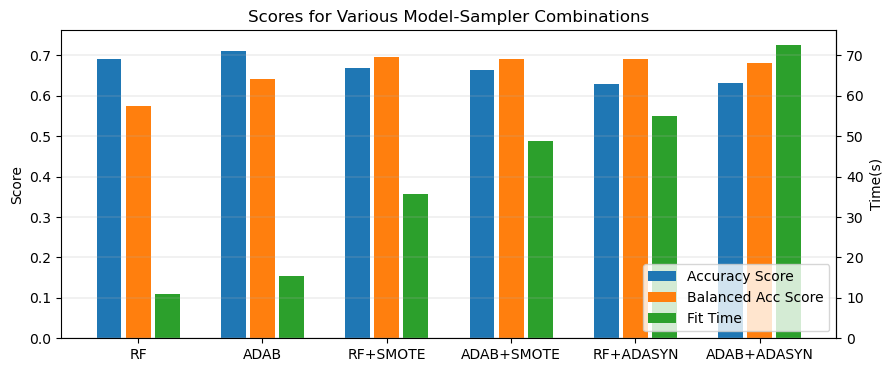

In [83]:
fig, ax = plt.subplots(figsize=(10,4))

result_list = [rf_results, ada_results, smote_rf_results, smote_ada_results, adasyn_rf_results, adasyn_ada_results]

bar_width = 0.3
step = 1.5
p = 0.05
x_pos = np.arange(0, len(result_list) * step, step=step)
x_labels= ["RF", "ADAB", "RF+SMOTE", "ADAB+SMOTE", "RF+ADASYN", "ADAB+ADASYN"]

acc_list = [x.get("val_scores").get("accuracy").get("mean") for x in result_list]
bal_acc_list = [x.get("val_scores").get("balanced_accuracy").get("mean") for x in result_list]
fit_time_list = [x.get("val_scores").get("fit_time").get("mean") / 100 for x in result_list]

ax.bar(x_pos - bar_width - p, acc_list, label="Accuracy Score", width=bar_width)
ax.bar(x_pos, bal_acc_list, label="Balanced Acc Score", width=bar_width)
ax.bar(x_pos + bar_width + p, fit_time_list, label="Fit Time", width=bar_width)
ax2 = ax.secondary_yaxis("right")

ax2.set_ylabel("Time(s)")
ax.set_ylabel("Score")

ax2.set_yticks(np.arange(0, 0.8, 0.1), [int(x) for x in np.arange(0, 0.8, 0.1)*100])
ax.set_xticks(x_pos, x_labels)

plt.title("Scores for Various Model-Sampler Combinations")
plt.legend(loc="lower right")
plt.grid(axis="y", linewidth=0.25)
plt.show()